Dataset loaded with shape: (17420, 8)
Columns: ['date', 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']

Basic Statistics:
               HUFL          HULL          MUFL          MULL          LUFL  \
count  17420.000000  17420.000000  17420.000000  17420.000000  17420.000000   
mean       7.375141      2.242242      4.300239      0.881568      3.066062   
std        7.067744      2.042342      6.826978      1.809293      1.164506   
min      -22.705999     -4.756000    -25.087999     -5.934000     -1.188000   
25%        5.827000      0.737000      3.296000     -0.284000      2.315000   
50%        8.774000      2.210000      5.970000      0.959000      2.833000   
75%       11.788000      3.684000      8.635000      2.203000      3.625000   
max       23.643999     10.114000     17.341000      7.747000      8.498000   

               LULL            OT  
count  17420.000000  17420.000000  
mean       0.856932     13.324672  
std        0.599552      8.566946  
min       -1.37

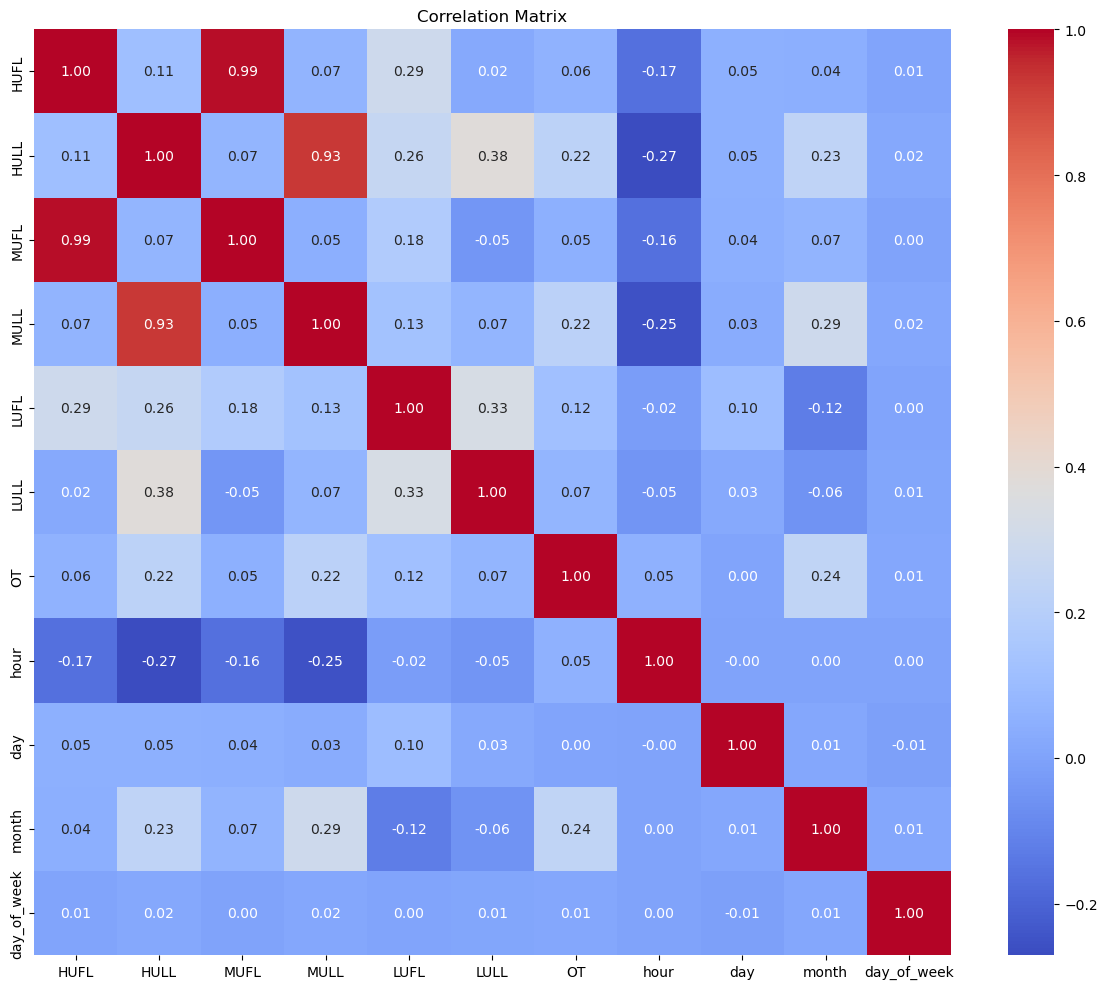


--- Model 1: Random Forest with Raw Features ---
--- Random Forest with Raw Features Performance Metrics ---
Mean Squared Error (MSE): 4.5040
Root Mean Squared Error (RMSE): 2.1223
Mean Absolute Error (MAE): 1.3758
R-squared (R²): 0.9383


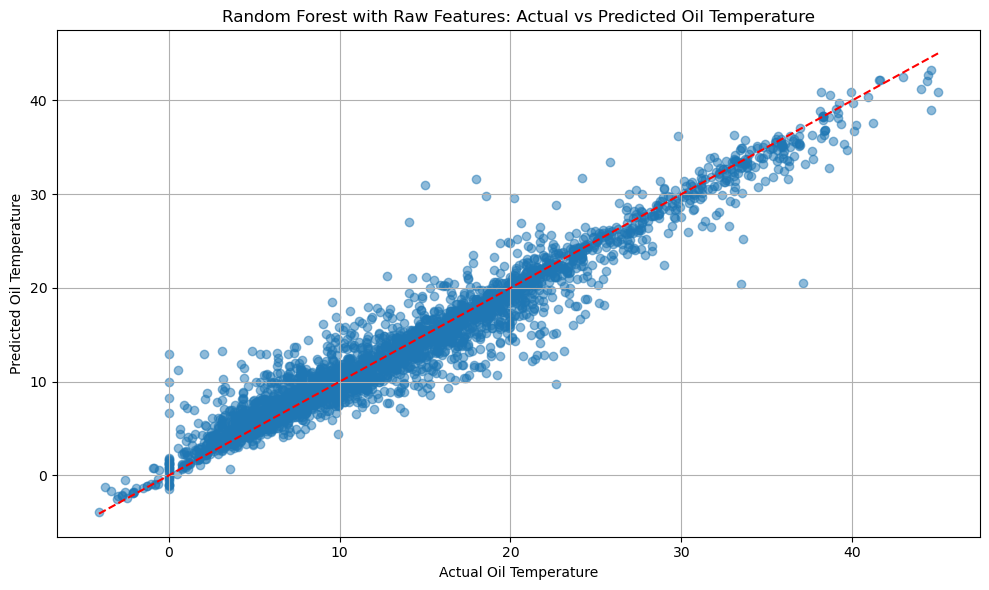


Feature Importance for Model 1:
HUFL: 0.0281
HULL: 0.0833
MUFL: 0.0380
MULL: 0.0381
LUFL: 0.0232
LULL: 0.0529
hour: 0.0251
day: 0.0828
month: 0.6080
day_of_week: 0.0205


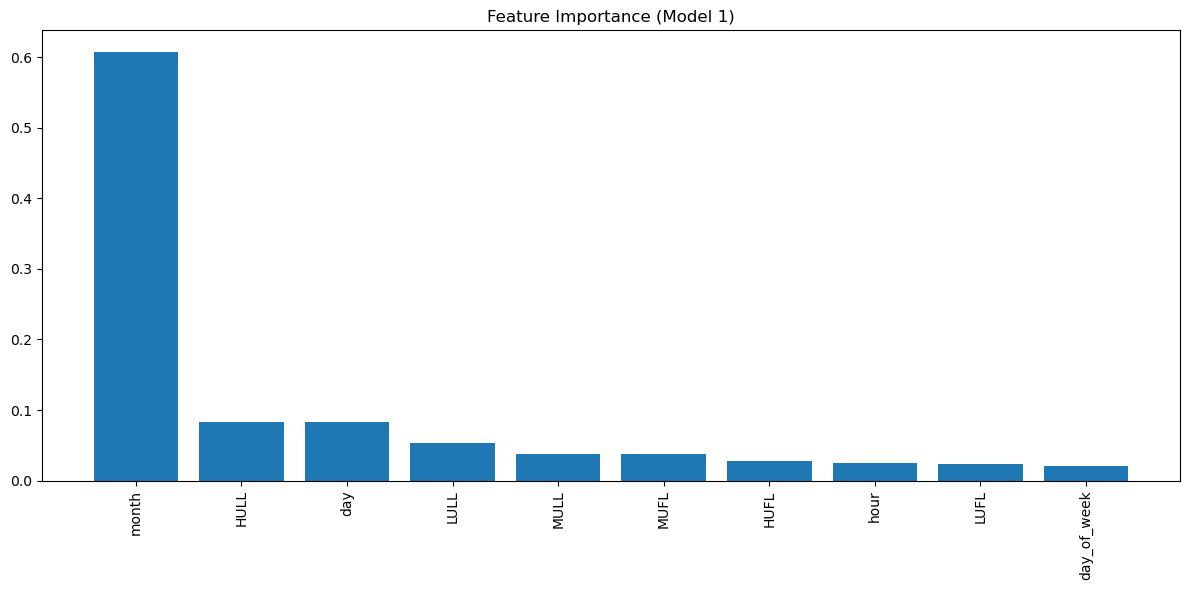


--- Model 2: Random Forest with Aggregated Features ---


/var/folders/nx/9zdhfhm57x339x_66wch7hdw0000gn/T/ipykernel_15812/3411605926.py:207: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_features[f'{feat1}_{feat2}_interaction'] = ett_data[feat1] * ett_data[feat2]
/var/folders/nx/9zdhfhm57x339x_66wch7hdw0000gn/T/ipykernel_15812/3411605926.py:207: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_features[f'{feat1}_{feat2}_interaction'] = ett_data[feat1] * ett_data[feat2]
/var/folders/nx/9zdhfhm57x339x_66wch7hdw0000gn/T/ipykernel_15812/3411605926.py:205: PerformanceWarning: DataFram

--- Random Forest with Aggregated Features Performance Metrics ---
Mean Squared Error (MSE): 0.7995
Root Mean Squared Error (RMSE): 0.8942
Mean Absolute Error (MAE): 0.6242
R-squared (R²): 0.9890


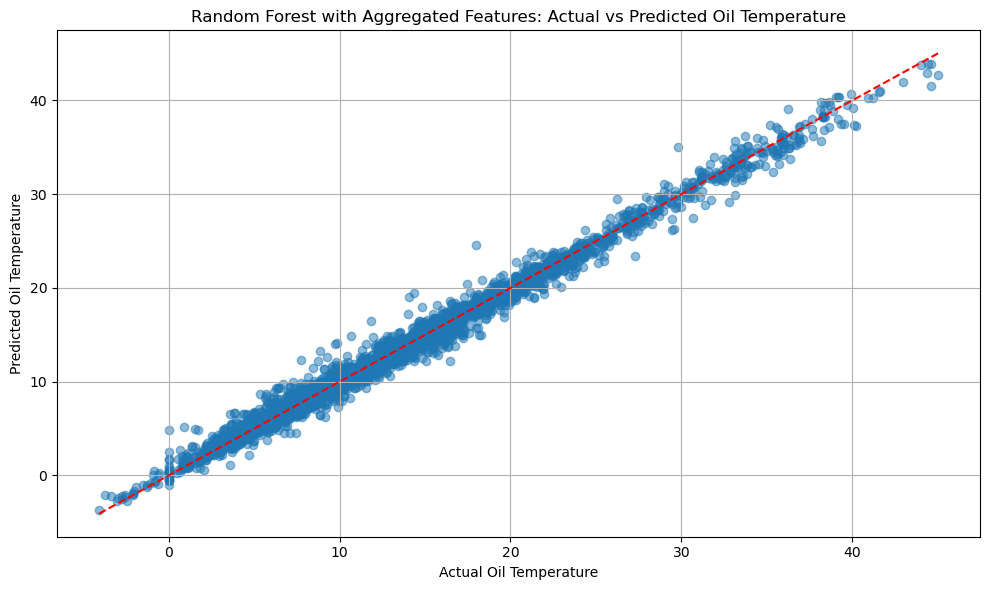


Top 20 Feature Importance for Model 2:
month_sin: 0.2859
MUFL_min: 0.2435
month_cos: 0.0878
HUFL_max: 0.0652
month_rolling_mean_24h: 0.0626
MULL_min: 0.0244
day_rolling_mean_24h: 0.0198
LUFL_median: 0.0166
HULL_min: 0.0166
MUFL_mean: 0.0155
LUFL_mean: 0.0084
HUFL_median: 0.0080
HUFL_mean: 0.0078
MUFL_median: 0.0059
LUFL_std: 0.0056
MULL_mean: 0.0053
LULL_median: 0.0046
HUFL_min: 0.0042
LULL_min: 0.0040
MULL_rolling_mean_24h: 0.0032


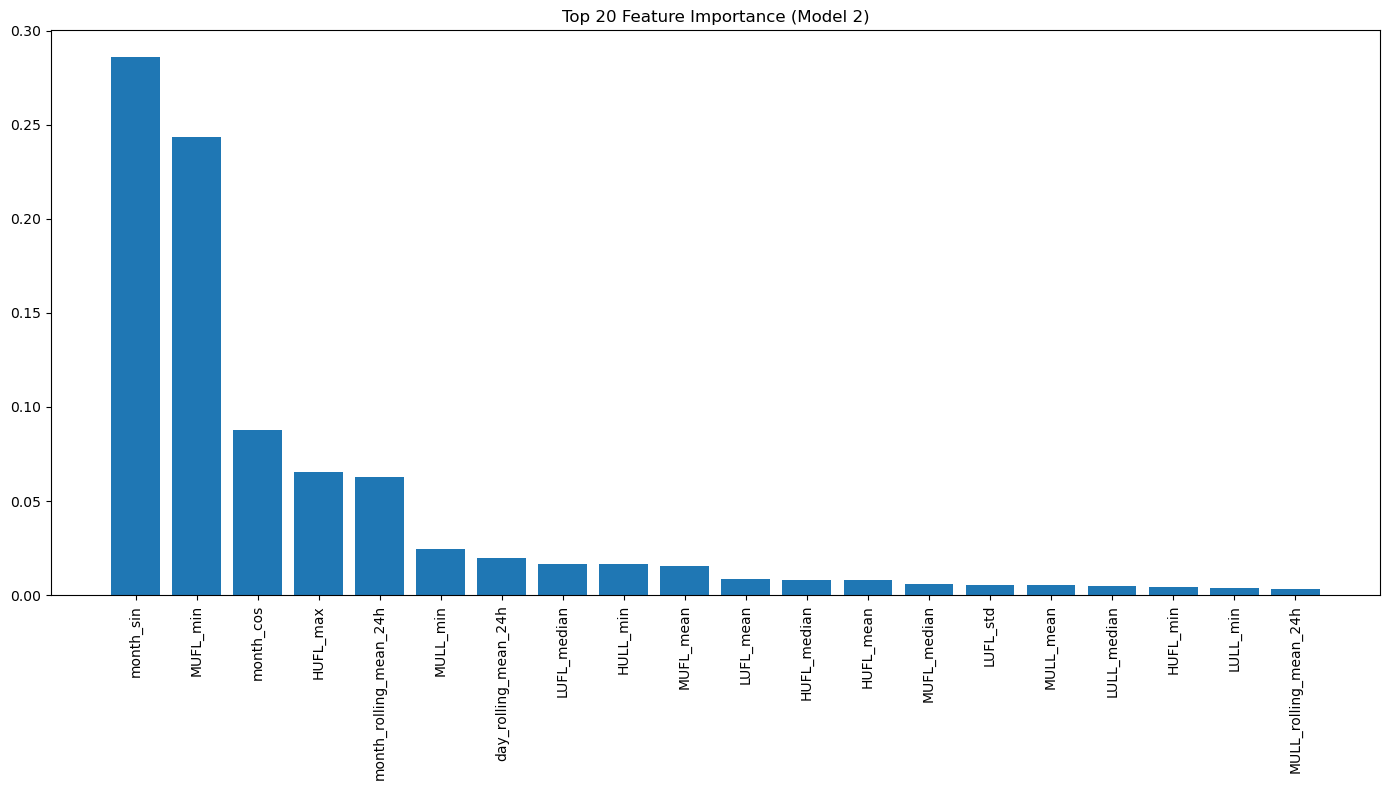


--- Model Comparison ---
                          Model 1 (Raw)    Model 2 (Aggregated)
Mean Squared Error (MSE):  4.5040        0.7995
Root MSE (RMSE):           2.1223        0.8942
Mean Absolute Error (MAE): 1.3758        0.6242
R-squared (R²):            0.9383        0.9890


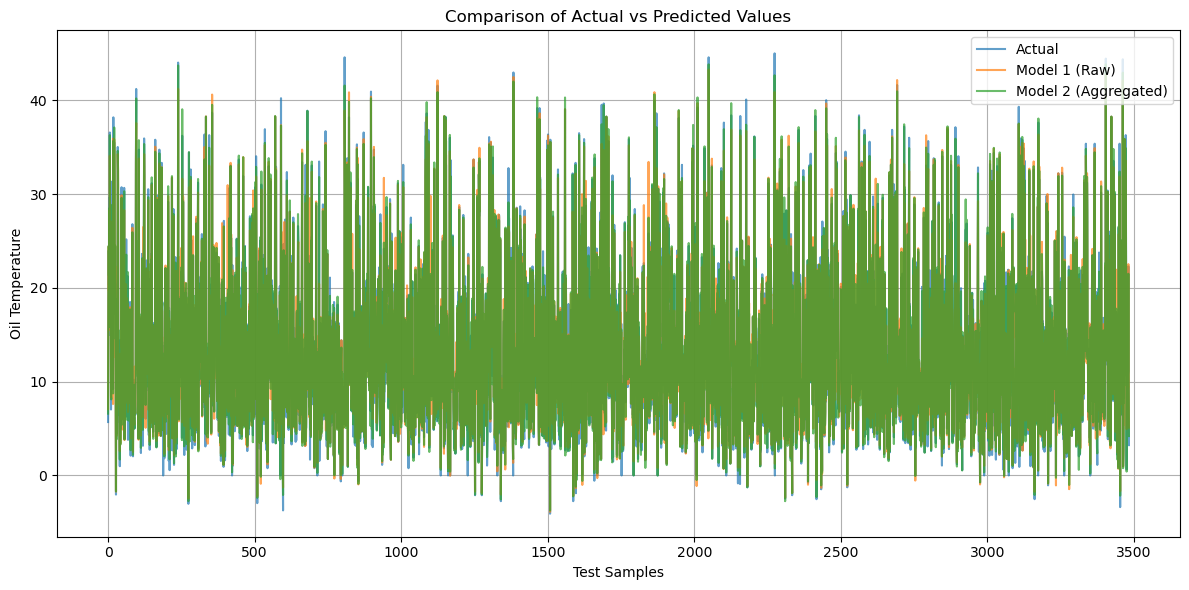

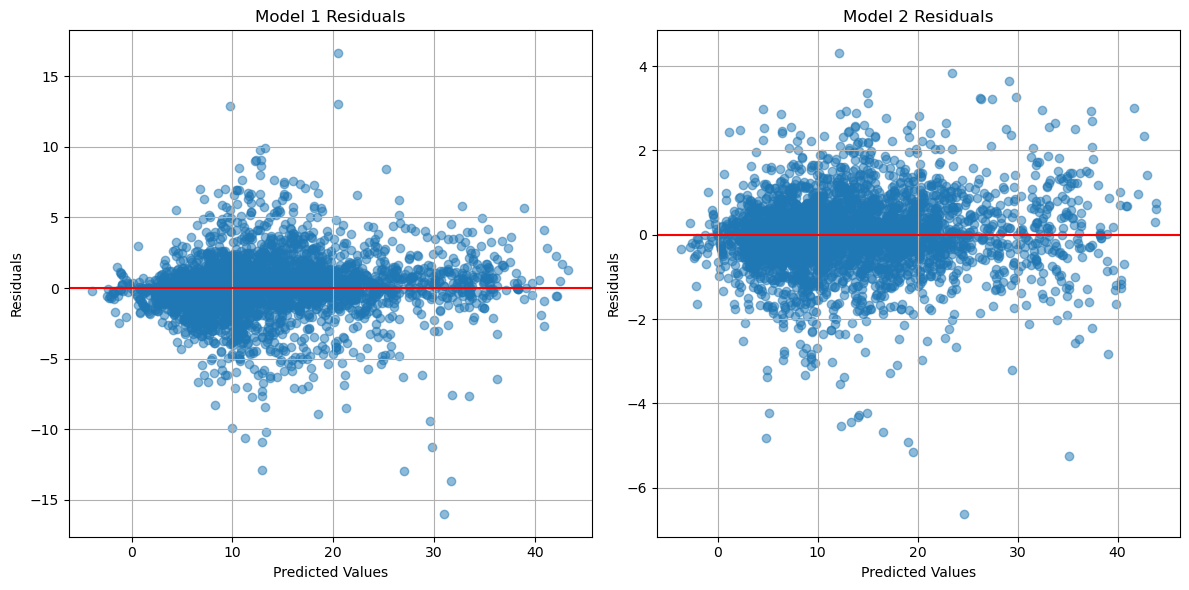

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Function to evaluate regression models
def evaluate_regression_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} Performance Metrics ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Oil Temperature')
    plt.ylabel('Predicted Oil Temperature')
    plt.title(f'{model_name}: Actual vs Predicted Oil Temperature')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return mse, rmse, mae, r2

# Function to load and prepare ETT dataset
def load_ett_dataset(file_path):
    try:
        # Try to load the dataset
        data = pd.read_csv(file_path)
        print(f"Dataset loaded with shape: {data.shape}")
        print(f"Columns: {data.columns.tolist()}")
        return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        print("Using sample ETT data structure based on documentation...")
        
        # Create a sample ETT dataset structure as per documentation
        # Typical ETT dataset has date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT (target)
        # This is sample data with reasonable values
        n_samples = 1000
        
        # Create a date range
        dates = pd.date_range(start='2020-01-01', periods=n_samples, freq='H')
        
        # Create synthetic power load features (6 features)
        np.random.seed(42)
        hufl = np.random.normal(loc=50, scale=10, size=n_samples)
        hull = np.random.normal(loc=30, scale=8, size=n_samples)
        mufl = np.random.normal(loc=40, scale=12, size=n_samples)
        mull = np.random.normal(loc=25, scale=9, size=n_samples)
        lufl = np.random.normal(loc=60, scale=15, size=n_samples)
        lull = np.random.normal(loc=35, scale=11, size=n_samples)
        
        # Create target variable (oil temperature) with some relationship to features
        ot = (0.2 * hufl + 0.1 * hull + 0.15 * mufl + 
              0.1 * mull + 0.25 * lufl + 0.2 * lull + 
              np.random.normal(loc=0, scale=5, size=n_samples))
        
        # Create the DataFrame
        data = pd.DataFrame({
            'date': dates,
            'HUFL': hufl,
            'HULL': hull,
            'MUFL': mufl, 
            'MULL': mull,
            'LUFL': lufl,
            'LULL': lull,
            'OT': ot
        })
        
        print(f"Sample dataset created with shape: {data.shape}")
        print(f"Columns: {data.columns.tolist()}")
        return data

# Try to load the ETT dataset (replace with your actual file path)
DATA_PATH = 'https://raw.githubusercontent.com/zhouhaoyi/ETDataset/refs/heads/main/ETT-small/ETTh1.csv'  # or ETTh2.csv, ETTm1.csv, ETTm2.csv depending on your dataset
ett_data = load_ett_dataset(DATA_PATH)

# Basic data exploration
print("\nBasic Statistics:")
print(ett_data.describe())

# Check for missing values
print("\nMissing Values:")
print(ett_data.isnull().sum())

# Convert date column to datetime if it exists
if 'date' in ett_data.columns:
    ett_data['date'] = pd.to_datetime(ett_data['date'])
    # Extract time-based features
    ett_data['hour'] = ett_data['date'].dt.hour
    ett_data['day'] = ett_data['date'].dt.day
    ett_data['month'] = ett_data['date'].dt.month
    ett_data['day_of_week'] = ett_data['date'].dt.dayofweek

# Plot correlation matrix
plt.figure(figsize=(12, 10))
numeric_data = ett_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify features and target
target_column = 'OT'  # Oil Temperature is typically the target
y = ett_data[target_column]

# Prepare features for Model 1: Using only available fields
date_columns = ['date']
target_columns = [target_column]
excluded_columns = date_columns + target_columns

X = ett_data.drop(columns=excluded_columns)
feature_names = X.columns.tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest with Raw Features
print("\n--- Model 1: Random Forest with Raw Features ---")
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model1.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf1 = rf_model1.predict(X_test_scaled)
metrics_rf1 = evaluate_regression_model(y_test, y_pred_rf1, "Random Forest with Raw Features")

# Print feature importance for Model 1
print("\nFeature Importance for Model 1:")
importance = rf_model1.feature_importances_
for i, imp in enumerate(importance):
    print(f"{feature_names[i]}: {imp:.4f}")

# Create a bar chart for feature importance
plt.figure(figsize=(12, 6))
indices = np.argsort(importance)[::-1]
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title('Feature Importance (Model 1)')
plt.tight_layout()
plt.show()

# Model 2: Random Forest with Aggregated Features
print("\n--- Model 2: Random Forest with Aggregated Features ---")

# Create aggregated features
agg_features = pd.DataFrame()

# Time-based aggregations if date exists
if 'date' in ett_data.columns:
    # Group by day, calculate daily statistics for each feature
    daily_stats = ett_data.groupby(ett_data['date'].dt.date).agg({
        'HUFL': ['mean', 'median', 'std', 'min', 'max'],
        'HULL': ['mean', 'median', 'std', 'min', 'max'],
        'MUFL': ['mean', 'median', 'std', 'min', 'max'],
        'MULL': ['mean', 'median', 'std', 'min', 'max'],
        'LUFL': ['mean', 'median', 'std', 'min', 'max'],
        'LULL': ['mean', 'median', 'std', 'min', 'max']
        # ,'OT': ['mean', 'median', 'std', 'min', 'max']
    })
    
    # Flatten the column names
    daily_stats.columns = ['_'.join(col).strip() for col in daily_stats.columns.values]
    
    # Map these aggregations back to the original data
    for col in daily_stats.columns:
        agg_features[col] = ett_data['date'].dt.date.map(daily_stats[col])

# Add rolling statistics
window_sizes = [6, 12, 24]  # Hours for rolling windows
for feature in X.columns:
    for window in window_sizes:
        agg_features[f'{feature}_rolling_mean_{window}h'] = ett_data[feature].rolling(window=window, min_periods=1).mean()
        agg_features[f'{feature}_rolling_std_{window}h'] = ett_data[feature].rolling(window=window, min_periods=1).std().fillna(0)

# Add basic statistical features across power load features
power_features = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
agg_features['mean_power_load'] = ett_data[power_features].mean(axis=1)
agg_features['median_power_load'] = ett_data[power_features].median(axis=1)
agg_features['std_power_load'] = ett_data[power_features].std(axis=1)
agg_features['max_power_load'] = ett_data[power_features].max(axis=1)
agg_features['min_power_load'] = ett_data[power_features].min(axis=1)
agg_features['range_power_load'] = agg_features['max_power_load'] - agg_features['min_power_load']

# Add polynomial features and interactions
for i, feat1 in enumerate(power_features):
    agg_features[f'{feat1}_squared'] = ett_data[feat1] ** 2
    for feat2 in power_features[i+1:]:
        agg_features[f'{feat1}_{feat2}_interaction'] = ett_data[feat1] * ett_data[feat2]

# Add cyclical time features if date exists
if 'hour' in ett_data.columns:
    agg_features['hour_sin'] = np.sin(2 * np.pi * ett_data['hour']/24)
    agg_features['hour_cos'] = np.cos(2 * np.pi * ett_data['hour']/24)
    
if 'day_of_week' in ett_data.columns:
    agg_features['day_of_week_sin'] = np.sin(2 * np.pi * ett_data['day_of_week']/7)
    agg_features['day_of_week_cos'] = np.cos(2 * np.pi * ett_data['day_of_week']/7)
    
if 'month' in ett_data.columns:
    agg_features['month_sin'] = np.sin(2 * np.pi * ett_data['month']/12)
    agg_features['month_cos'] = np.cos(2 * np.pi * ett_data['month']/12)

# Combine original features with aggregated ones
X_combined = pd.concat([X, agg_features], axis=1)
combined_feature_names = X_combined.columns.tolist()

# Split the data for model 2
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Scale the features
scaler_combined = StandardScaler()
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)

# Train Random Forest on combined features
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train_combined_scaled, y_train)

# Predict and evaluate
y_pred_rf2 = rf_model2.predict(X_test_combined_scaled)
metrics_rf2 = evaluate_regression_model(y_test, y_pred_rf2, "Random Forest with Aggregated Features")

# Print feature importance for Model 2
print("\nTop 20 Feature Importance for Model 2:")
importance2 = rf_model2.feature_importances_
indices2 = np.argsort(importance2)[::-1]
for i in indices2[:20]:  # Show only top 20 due to potentially large number of features
    print(f"{combined_feature_names[i]}: {importance2[i]:.4f}")

# Create a bar chart for feature importance (top 20)
plt.figure(figsize=(14, 8))
plt.bar(range(20), importance2[indices2[:20]])
plt.xticks(range(20), [combined_feature_names[i] for i in indices2[:20]], rotation=90)
plt.title('Top 20 Feature Importance (Model 2)')
plt.tight_layout()
plt.show()

# Compare the models
print("\n--- Model Comparison ---")
print("                          Model 1 (Raw)    Model 2 (Aggregated)")
print(f"Mean Squared Error (MSE):  {metrics_rf1[0]:.4f}        {metrics_rf2[0]:.4f}")
print(f"Root MSE (RMSE):           {metrics_rf1[1]:.4f}        {metrics_rf2[1]:.4f}")
print(f"Mean Absolute Error (MAE): {metrics_rf1[2]:.4f}        {metrics_rf2[2]:.4f}")
print(f"R-squared (R²):            {metrics_rf1[3]:.4f}        {metrics_rf2[3]:.4f}")

# Create visualizations to compare predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual', alpha=0.7)
plt.plot(y_pred_rf1, label='Model 1 (Raw)', alpha=0.7)
plt.plot(y_pred_rf2, label='Model 2 (Aggregated)', alpha=0.7)
plt.xlabel('Test Samples')
plt.ylabel('Oil Temperature')
plt.title('Comparison of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_rf1, y_test - y_pred_rf1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Model 1 Residuals')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf2, y_test - y_pred_rf2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Model 2 Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
### OLD CODE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

DATA_PATH = 'https://raw.githubusercontent.com/zhouhaoyi/ETDataset/refs/heads/main/ETT-small/ETTh1.csv'

# 1. Load the ETT dataset
def load_ett_dataset(file_path):
    df = pd.read_csv(file_path)
    # Converting date to datetime
    df['date'] = pd.to_datetime(df['date'])
    return df

# 2. Prepare data for binary classification
def prepare_binary_classification(df):
    # Create a binary target: 1 if oil temperature is above median, 0 otherwise
    ot_median = df['OT'].median()
    df['target'] = (df['OT'] > ot_median).astype(int)
    
    # Use all features except 'date' and 'OT' (original target)
    features = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']
    X = df[features]
    y = df['target']
    
    return X, y, df

# 3. Train a simple classifier
def train_classifier(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Train a Random Forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    return model, scaler

# 4. Create time-based splits for monitoring drift
def create_time_splits(df, num_intervals=5):
    # Sort by date to ensure chronological order
    df = df.sort_values('date')
    
    # Calculate interval boundaries
    interval_size = len(df) // num_intervals
    splits = []
    
    for i in range(num_intervals):
        start_idx = i * interval_size
        end_idx = (i + 1) * interval_size if i < num_intervals - 1 else len(df)
        splits.append(df.iloc[start_idx:end_idx])
    
    return splits

# Main execution flow
if __name__ == "__main__":
    # Load data
    df = load_ett_dataset(DATA_PATH)
    X, y, df_with_target = prepare_binary_classification(df)
    
    # Split into training and testing sets (80/20)
    # We use an initial time-based split for standard ML validation
    train_size = int(0.8 * len(df))
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
    X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
    
    # Train the model
    model, scaler = train_classifier(X_train, y_train)
    
    # Evaluate on test set
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Create time intervals for drift detection
    time_splits = create_time_splits(df_with_target.iloc[train_size:], num_intervals=5)
    print(f"Created {len(time_splits)} time intervals for drift detection")
    
    # Print interval details
    for i, split in enumerate(time_splits):
        start_date = split['date'].min()
        end_date = split['date'].max()
        print(f"Interval {i+1}: {start_date} to {end_date}, {len(split)} samples")